In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                             user = "root",
                             password = "root",
                             database = "Ecommerce")

cur = db.cursor()

In [46]:
#1. List all unique cities where customers are located.
query =""" select distinct customer_city from customers"""

cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [47]:
#2. Count the number of orders placed in 2017.

query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""
cur.execute(query)
data = cur.fetchall()
data
"Total number of orders placed in 2017", data[0][0]

('Total number of orders placed in 2017', 135303)

In [48]:
# 3. Find the total sales per category.

#query = """select products.product_category, round(sum(payments.payment_value),2)
#from products join order_items
#on products.product_id = order_items.product_id
#join payments
#on payments.order_id = order_items.order_id
#group by products.product_category"""
#cur.execute(query)
#data = cur.fetchall()
#data 
# or
query = """ select products.product_category, round(sum(payments.payment_value),2) as sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by products.product_category order by sales desc"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['category','sales'])
df

,category,sales
0,bed table bath,46238949.12
1,HEALTH BEAUTY,44749074.22
2,computer accessories,42803922.05
3,Furniture Decoration,38614762.58
4,Watches present,38588850.32
...,...,...
69,PC Gamer,58709.61
70,House Comfort 2,46184.58
71,cds music dvds,32384.61
72,Fashion Children's Clothing,21213.09


In [49]:
#4. Calculate the percentage of orders that were paid in installments.
query = """ select ((sum(case when payment_installments >= 1 then 1
else 0 end))/count(*))*100 from payments
"""
cur.execute(query)
data = cur.fetchall()

"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

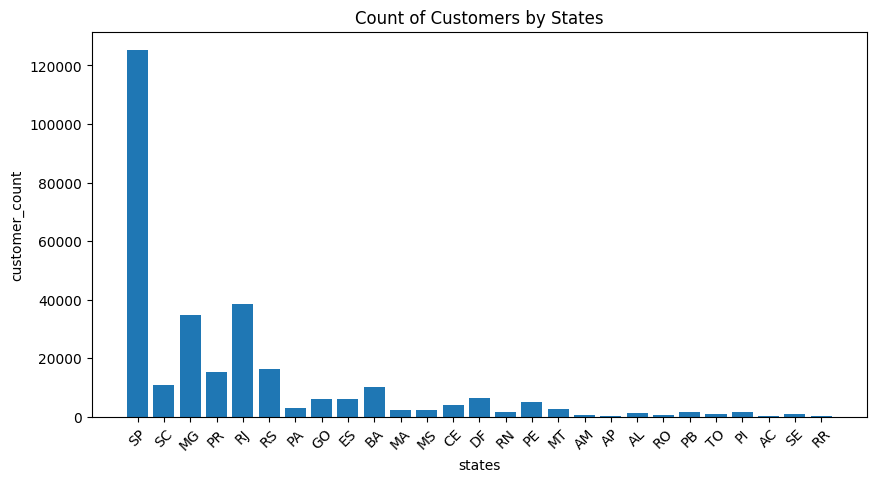

In [50]:
#5. Count the number of customers from each state.
query = """ select customer_state ,count(customer_id)
from customers group by customer_state"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count" ])
#df = df.sort_values(by = "customer_count", ascending= False)

plt.figure(figsize = (10,5))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 45)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
plt.show()

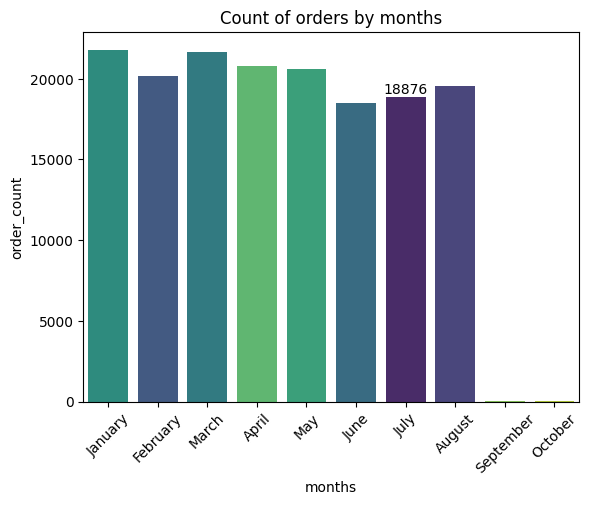

In [51]:
#6. Calculate the number of orders per month in 2018.
query = """Select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders 
where year(order_purchase_timestamp) = 2018
group by months"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months", "order_count" ])
O = ["January","February","March","April","May","June","July","August","September","October"]

#ax = sns.barplot(x = df["months"], y = df["order_count"], data = df, order = O, color = "Red")
ax = sns.barplot(x = df["months"], y = df["order_count"], data = df, order = O, hue = df["months"], palette = "viridis")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of orders by months")
plt.show()

In [52]:
#7. Find the average number of products per order, grouped by customer city.
query = """with count_per_order as
(select orders.order_id, orders.customer_id,count(order_items.order_id) order_item_count
from orders 
join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)
select customers.customer_city,round(avg(count_per_order.order_item_count),2) avg_orders
from customers
join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city"""

cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns= ["customer_city","avg_orders"])
df.head(10)

,customer_city,avg_orders
0,sao jose dos campos,10.25
1,indaial,10.04
2,treze tilias,11.45
3,sao paulo,10.41
4,rio de janeiro,10.32
5,mario campos,12.00
6,guariba,9.00
7,cuiaba,10.78
8,franca,11.26
9,tocos,9.00


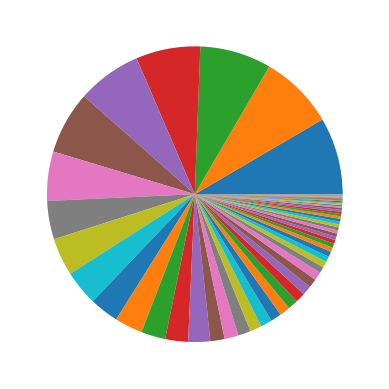

In [58]:
#8. Calculate the percentage of total revenue contributed by each product category.
query = """select products.product_category,round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) total_sales
from products
join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by products.product_category 
order by total_sales desc"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["product_category","total_sales"])

plt.pie(df["total_sales"])
plt.show()

In [64]:
#9. Identify the correlation between product price and the number of times a product has been purchased.
import numpy as np
query = """select products.product_category, count(products.product_id) as total_products,round(avg(order_items.price),2) prices
from products
join order_items
on products.product_id = order_items.product_id
group by product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["product_category","total_products","prices"])
df
arr1 = df["total_products"]
arr2 = df['prices']
a = np.corrcoef(arr1,arr2)
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157556


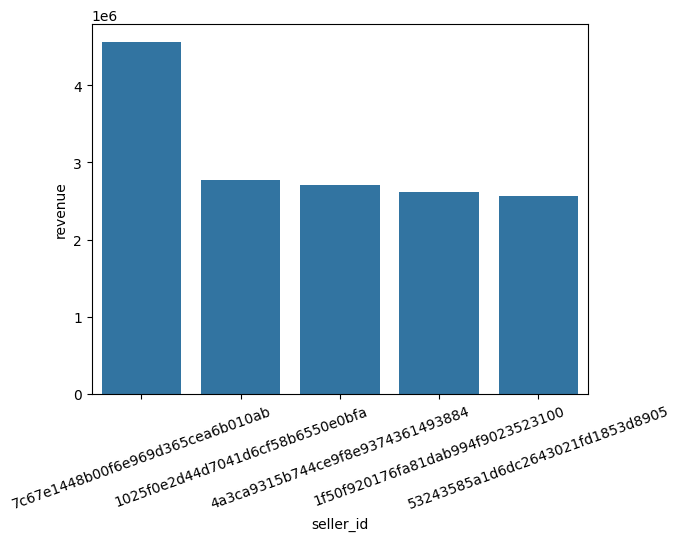

In [82]:
#10.  Calculate the total revenue generated by each seller, and rank them by revenue.
query = """select *, dense_rank()over(order by revenue desc) as ranking
from (select order_items.seller_id, round(sum(payments.payment_value),2)revenue
FROM payments
join order_items
on payments.order_id = order_items.order_id
group by seller_id
order by revenue) as sale"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id","revenue","rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 20)
plt.show()


In [83]:
#11. Calculate the moving average of order values for each customer over their order history.
query = """select customer_id,order_purchase_timestamp,payment, avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row)as mov_avg
from (select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
from payments
join orders
on orders.order_id = payments.order_id) as a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer_id","order_purchase_timestamp","payment","mov_avg"])
df


,customer_id,order_purchase_timestamp,payment,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
934969,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934970,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934971,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934972,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
